In [10]:
import requests

r = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/australian_scale")

In [11]:
from io import BytesIO
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file(BytesIO(r.content), n_features=14)
X = X.toarray()

In [12]:
import numpy

n_samples, n_features = X.shape
X = numpy.column_stack((X, numpy.ones((n_samples, 1))))
y = y.reshape((-1, 1))

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5)

In [14]:
max_epoch = 100
learning_rate = 0.001
C = 0.5

losses_train = []
losses_val = []

In [15]:
# w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
w = numpy.random.random((n_features + 1, 1))  # initialize with random numbers
# w = numpy.random.normal(0.1, 0.1, size=(n_features + 1, 1))  # initialize with zero normal distribution

In [16]:
for epoch in range(max_epoch):
    h = 1 - y_train * numpy.dot(X_train, w)
    y_hat = numpy.where(h > 0, y_train, 0)
    w -= learning_rate * (w - C * numpy.dot(X_train.transpose(), y_hat))

    y_predict_train = numpy.where(numpy.dot(X_train, w) > 0, 1, -1)
    loss_train = numpy.sum(w * w) + C * numpy.sum(numpy.maximum(1 - y_train * numpy.dot(X_train, w), 0))
    losses_train.append(loss_train / y_train.size)

    y_predict_val = numpy.where(numpy.dot(X_val, w) > 0, 1, -1)
    loss_val = numpy.sum(w * w) + C * numpy.sum(numpy.maximum(1 - y_val * numpy.dot(X_val, w), 0))
    losses_val.append(loss_val/y_val.size)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_val, numpy.where(numpy.dot(X_val, w) > 0, 1, -1),
                            target_names=["positive", "negative"], digits=4))

              precision    recall  f1-score   support

    positive     0.9130    0.8750    0.8936       192
    negative     0.8509    0.8954    0.8726       153

    accuracy                         0.8841       345
   macro avg     0.8820    0.8852    0.8831       345
weighted avg     0.8855    0.8841    0.8843       345



Text(0.5, 1.0, 'The graph of loss value varing with the number of iterations')

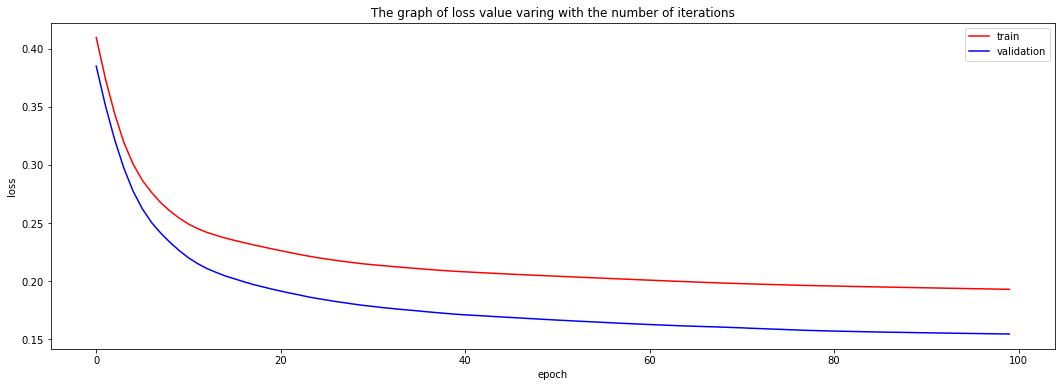

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_train, color="r", label="train")
plt.plot(losses_val, color="b", label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The graph of loss value varing with the number of iterations")